# QUES :- 1

In [11]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline





In [2]:
df = pd.read_csv('laptops.csv')



In [3]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


# Identify columns with missing values

In [5]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64


# Encode categorical variables and scale numerical features

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


NameError: name 'numerical_transformer' is not defined

In [ ]:
df_preprocessed = preprocessor.fit_transform(df)

# QUES :- 2

In [ ]:
X = df.drop(columns='Price')
y = df['Price']


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
corr_matrix = df.corr()

C:\Users\Student\AppData\Local\Temp\ipykernel_4164\3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


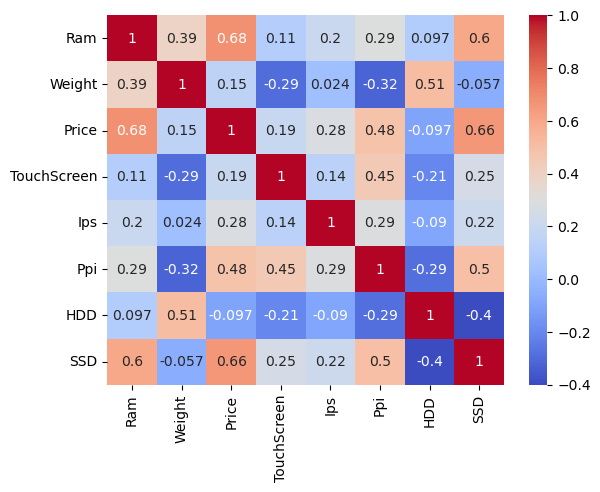

In [9]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# QUES :- 3

In [13]:
X = df.drop(columns='Price')
y = df['Price']

In [14]:
X = pd.get_dummies(X, drop_first=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
rf_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])


In [32]:
rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [33]:
y_pred_rf = rf_pipeline.predict(X_test)


In [34]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2


In [35]:
mae_rf, mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)


In [36]:
print("Random Forest Regressor:\nMAE: {:.2f}, MSE: {:.2f}, R2: {:.2f}".format(mae_rf, mse_rf, r2_rf))


Random Forest Regressor:
MAE: 0.17, MSE: 0.05, R2: 0.88


In [40]:
best_model = max((r2)))

SyntaxError: unmatched ')' (110032091.py, line 1)

# QUES :- 4

In [41]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [42]:
print("Random Forest Regressor Performance on Test Set:")
print("MAE: {:.2f}".format(mae_rf))
print("MSE: {:.2f}".format(mse_rf))
print("R2: {:.2f}".format(r2_rf))

Random Forest Regressor Performance on Test Set:
MAE: 0.17
MSE: 0.05
R2: 0.88
